In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transforms = Compose([
    ToTensor(),
    Normalize((0.5), (0.5))
])

batch_size = 64

In [4]:
training_data = datasets.MNIST(root='data', train=True, transform=transforms, download=True)
train = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)

validation_data = datasets.MNIST(root='data', train=False, transform=transforms, download=True)
valid = DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=2)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15805568.88it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 489918.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1061525.45it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2290002.26it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
import torch.nn.functional as F
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.cv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(3, stride=2)
        self.fc1 = nn.Linear(6 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        
        x = self.cv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

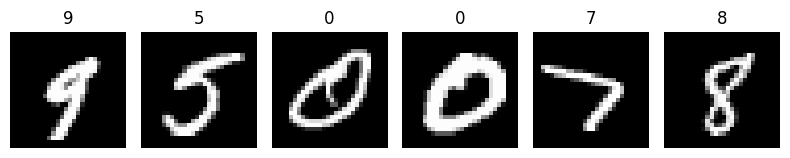

In [6]:
from PIL import Image

def imgshow(img):
    img = img.numpy()
    img = img*0.5 + 0.5
    img = img.squeeze(0)

    return img

data_iter = iter(train)

fig, axes = plt.subplots(1, 6, figsize=(8, 4))
for i in range(6):
    images, labels = next(data_iter)
    img = imgshow(images[0])

    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'{labels[0]}')

plt.tight_layout()
plt.show()

In [7]:
import torch.nn.functional as F
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.cv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=2)
        self.bn1 = nn.BatchNorm2d(6)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(3, stride=2)
        self.fc1 = nn.Linear(6 * 6 * 6, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        
        x = self.cv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        return x

In [8]:
import torch.optim as optim

model = Classifier()

learning_rate = 0.05

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

Training on cpu


Epoch [1/10], Train Loss: 0.2241, Train Acc: 92.86%, Val Loss: 0.1081, Val Acc: 96.53%


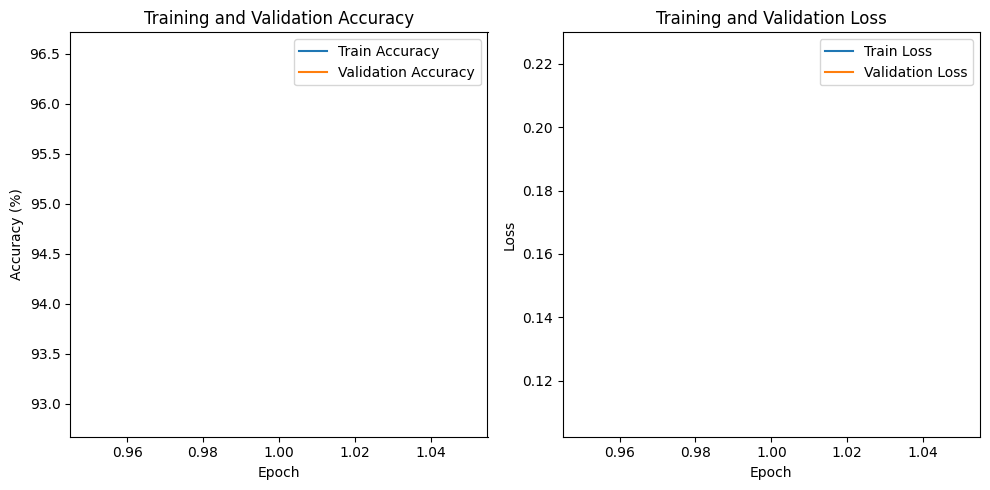

Epoch [2/10], Train Loss: 0.1104, Train Acc: 96.52%, Val Loss: 0.0918, Val Acc: 97.15%


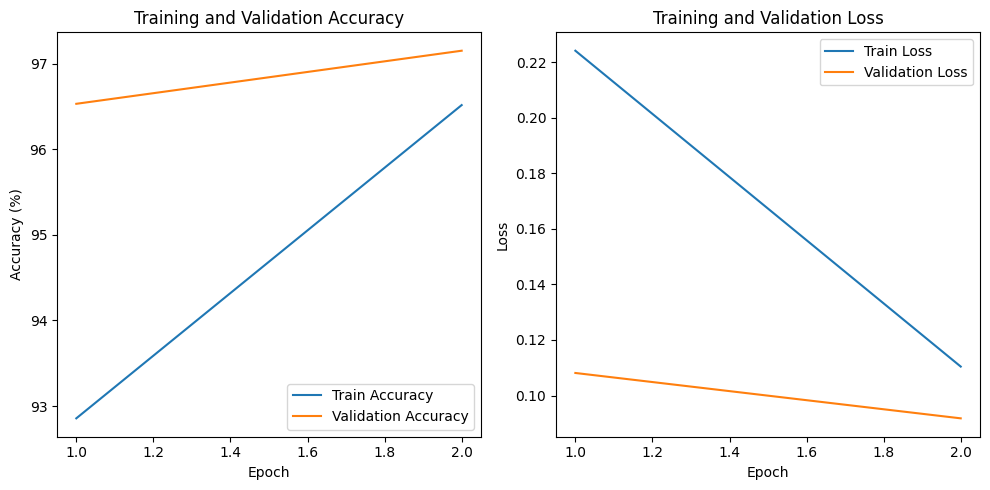

Epoch [3/10], Train Loss: 0.0915, Train Acc: 97.11%, Val Loss: 0.0883, Val Acc: 97.30%


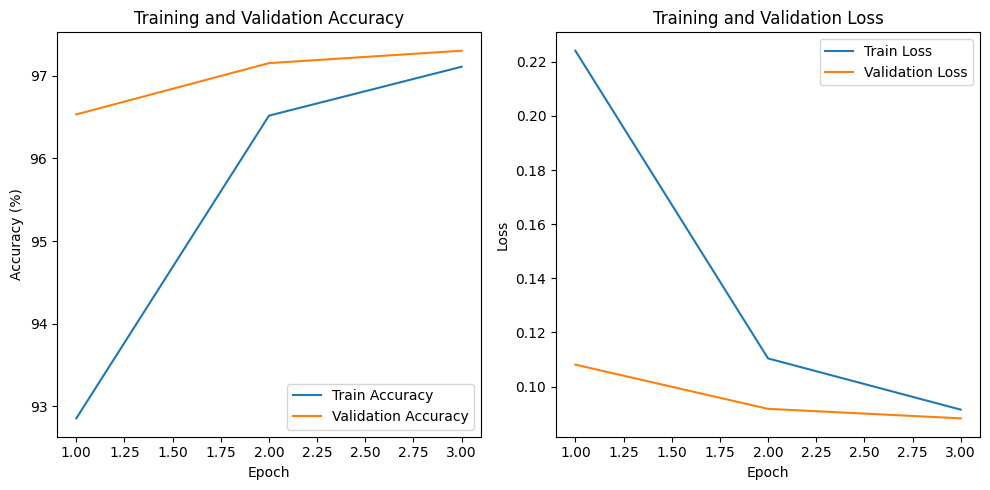

Epoch [4/10], Train Loss: 0.0786, Train Acc: 97.56%, Val Loss: 0.0810, Val Acc: 97.38%


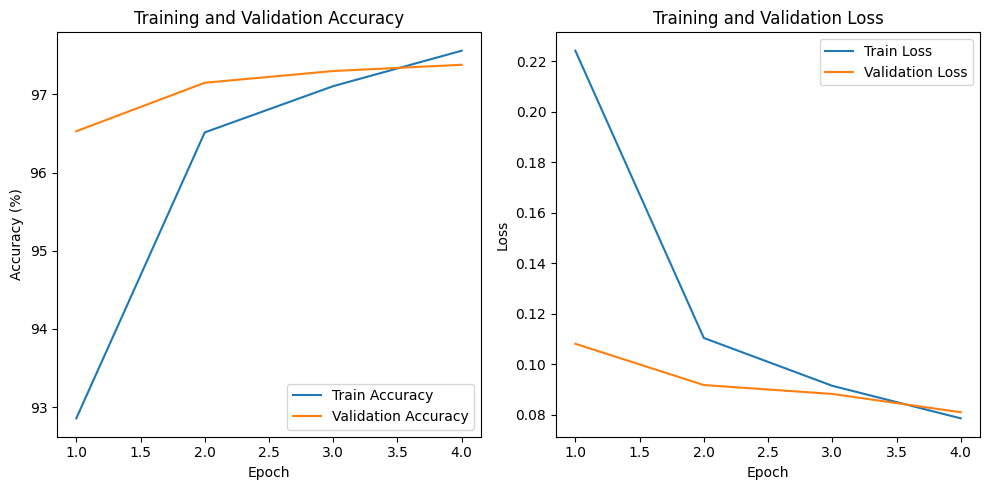

Epoch [5/10], Train Loss: 0.0737, Train Acc: 97.69%, Val Loss: 0.1016, Val Acc: 96.97%


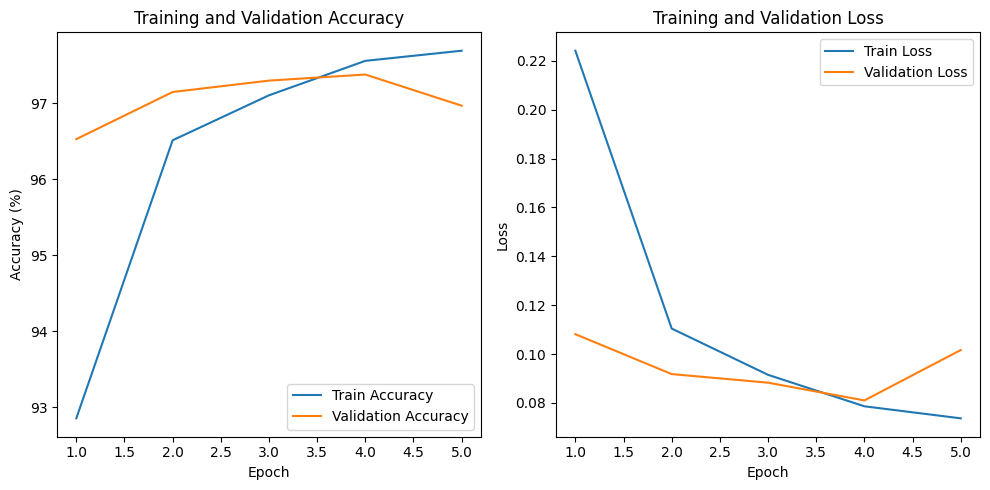

Epoch [6/10], Train Loss: 0.0691, Train Acc: 97.73%, Val Loss: 0.0931, Val Acc: 97.26%


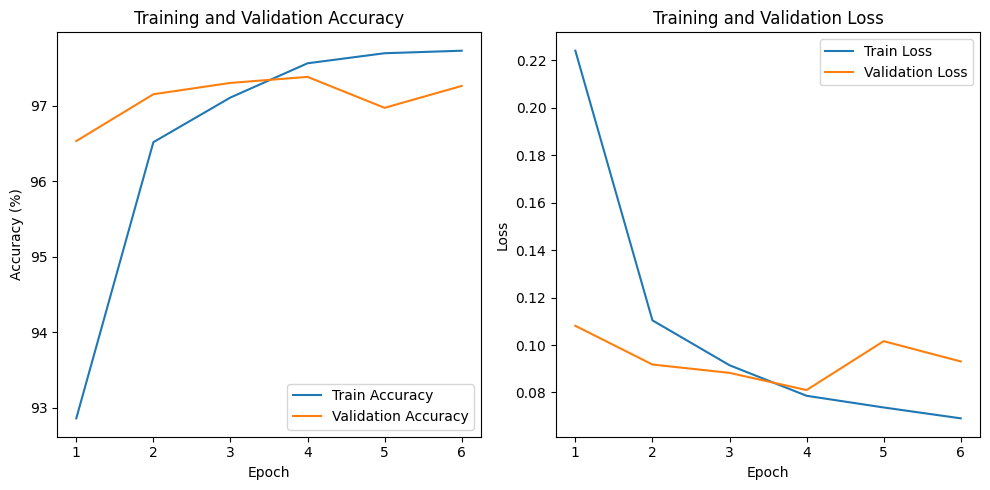

Epoch [7/10], Train Loss: 0.0635, Train Acc: 98.00%, Val Loss: 0.0795, Val Acc: 97.61%


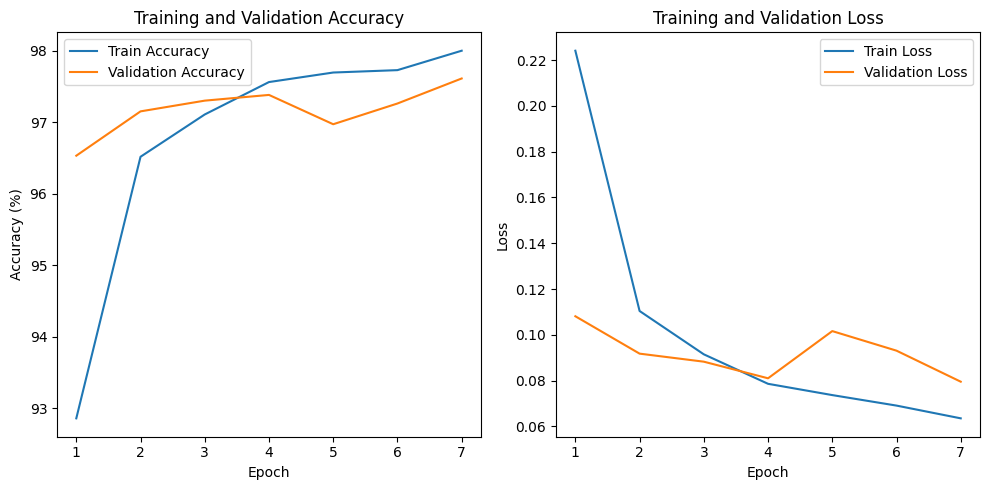

Epoch [8/10], Train Loss: 0.0613, Train Acc: 98.04%, Val Loss: 0.0998, Val Acc: 97.14%


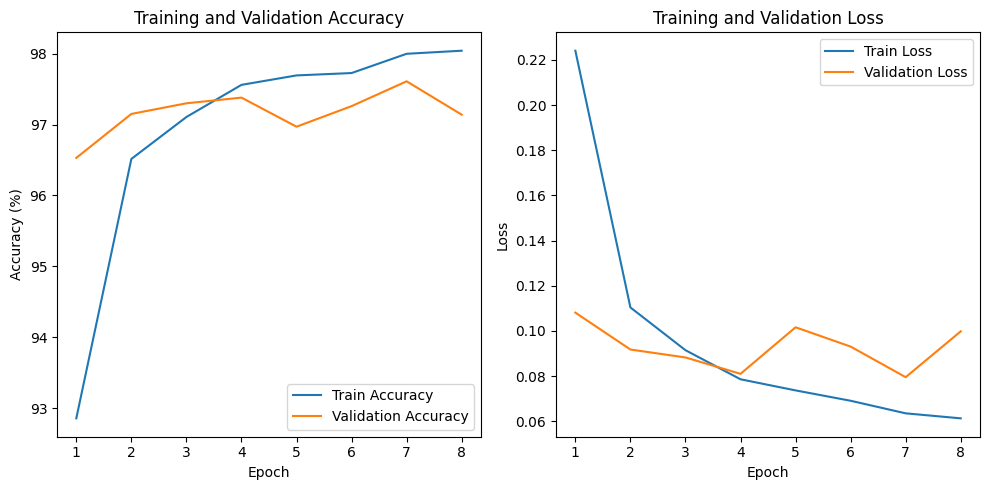

Epoch [9/10], Train Loss: 0.0566, Train Acc: 98.16%, Val Loss: 0.0811, Val Acc: 97.65%


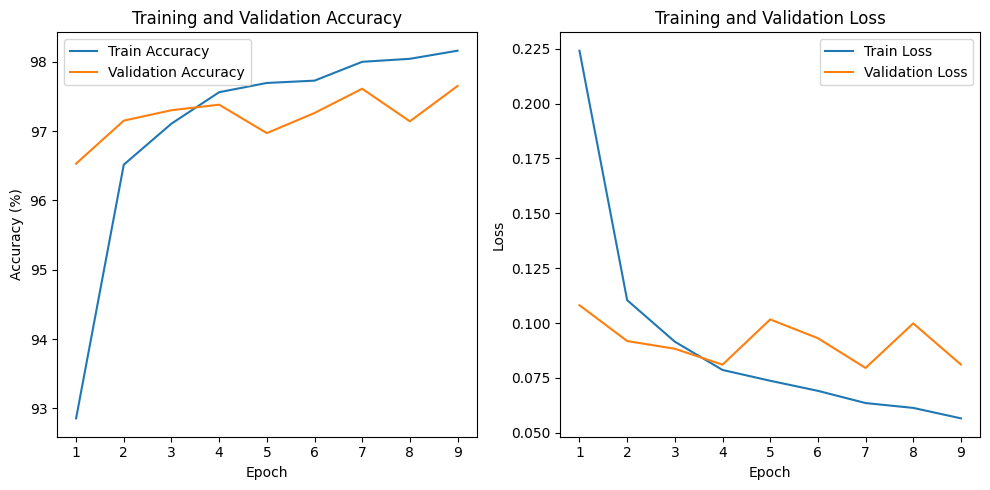

Epoch [10/10], Train Loss: 0.0489, Train Acc: 98.40%, Val Loss: 0.0869, Val Acc: 97.60%


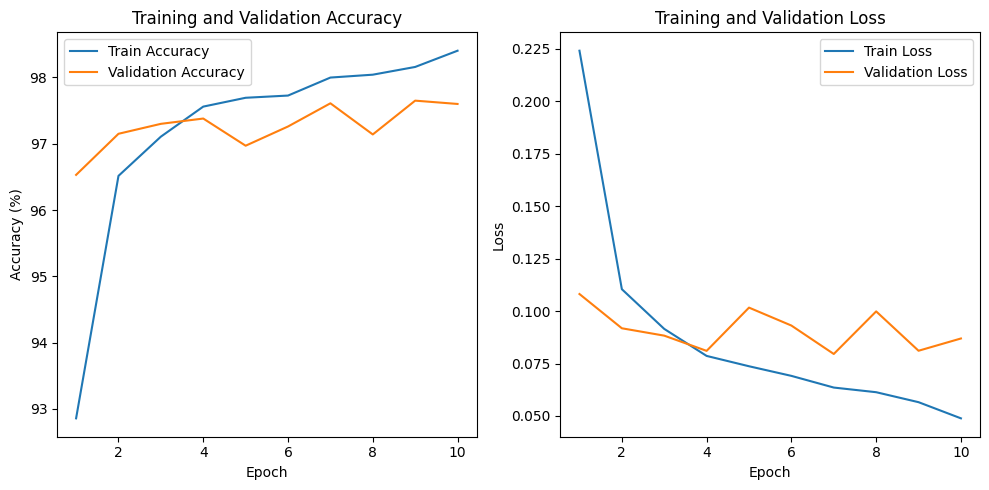

In [10]:
# Move model and criterion to GPU if available
model.to(device)
criterion.to(device)

def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_train_loss / len(train_loader)
        epoch_train_acc = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)

        # Validation
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = running_val_loss / len(val_loader)
        epoch_val_acc = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

        # Print and plot live
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')

        # Plot live
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, epoch + 2), train_accs, label='Train Accuracy')
        plt.plot(range(1, epoch + 2), val_accs, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy (%)')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epoch + 2), train_losses, label='Train Loss')
        plt.plot(range(1, epoch + 2), val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

num_epochs = 10  
train_model(model, criterion, optimizer, train, valid, num_epochs)

In [11]:
torch.save(model.state_dict(), 'trained.pth')

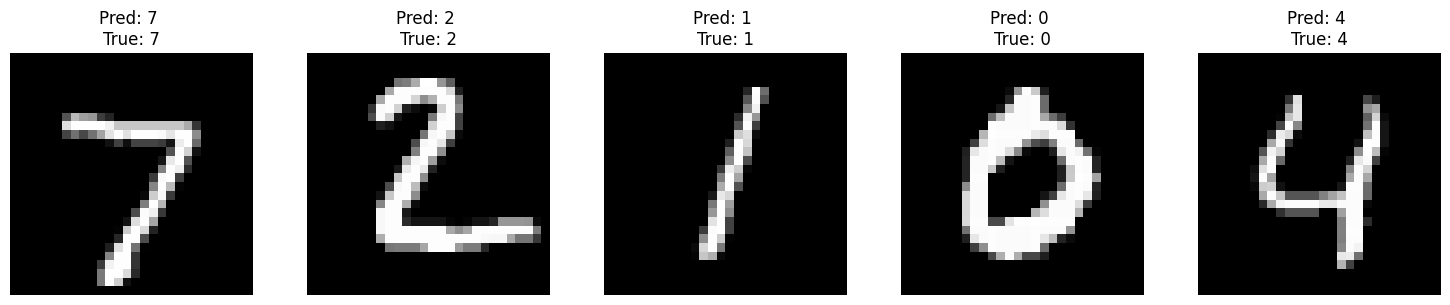

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def imshow(img, title, ax):
    img = img / 2 + 0.5
    npimg = img.cpu().numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

model = Classifier()
model.load_state_dict(torch.load('/kaggle/working/trained.pth'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Create a figure with 1 row and 5 columns
displayed = 0  

with torch.no_grad():
    for images, labels in valid:
        if displayed >= 5:
            break
        inputs = images.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        for j in range(len(images)):
            if displayed >= 5:
                break
            ax = axes[displayed]
            imshow(images[j], f'Pred: {predicted[j].item()} \nTrue: {labels[j].item()}', ax)
            displayed += 1

plt.tight_layout()
plt.show()